In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [3]:
X = df['log.Te'].values
Y = df['log.light'].values

In [4]:
XY0 = np.c_[X, Y]
N = len(XY0)
print(XY0[:10])

[[4.37 5.23]
 [4.56 5.74]
 [4.26 4.93]
 [4.56 5.74]
 [4.3  5.19]
 [4.46 5.46]
 [3.84 4.65]
 [4.57 5.27]
 [4.26 5.57]
 [4.37 5.12]]


In [5]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.87)
amf = af.averaging_function("AM")

[4.31       5.01212766]


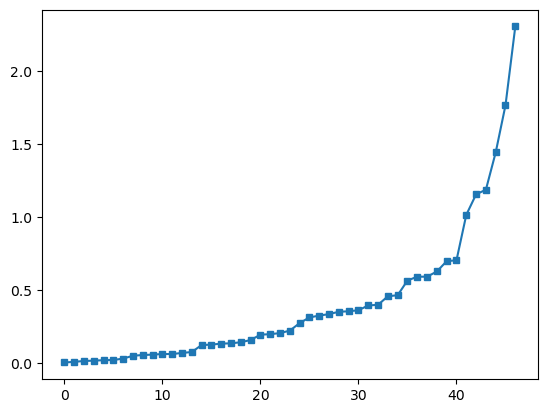

In [6]:
c0 = pca.find_center(XY0)
print(c0)
plt.plot(sorted(pca.distance_center(XY0, c0)), marker='s', markersize=4)
plt.show()

[4.3882749  4.95279837]


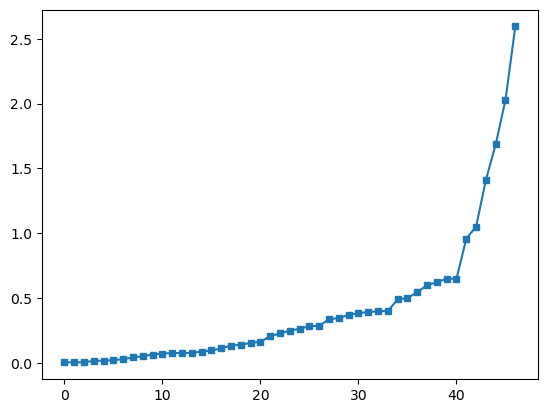

In [7]:
c = pca.find_rob_center(XY0, wma)
print(c)
plt.plot(sorted(pca.distance_center(XY0, c)), marker='s', markersize=4)
plt.show()

In [8]:
XY1 = XY0 - c
XY1_0 = XY0 - c0

In [9]:
a1_0, L1_0 = pca.find_pc(XY1_0)
print(L1_0, a1_0)

0.3242305209011537 [-0.14029464  0.9901098 ]


In [10]:
a1, L1 = pca.find_rob_pc(XY1, wma)
print(L1, a1)

0.25914452355424034 [0.17792996 0.98404316]


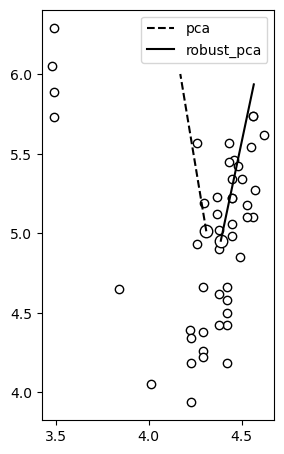

In [11]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(XY0[:,0], XY0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], [c[1]], s=81, c='w', edgecolors='k')
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], c='k', linestyle='--', label='pca')
plt.plot([c[0], c[0]+a1[0]], [c[1], c[1]+a1[1]], c='k', label='robust_pca')
plt.legend()
plt.show()

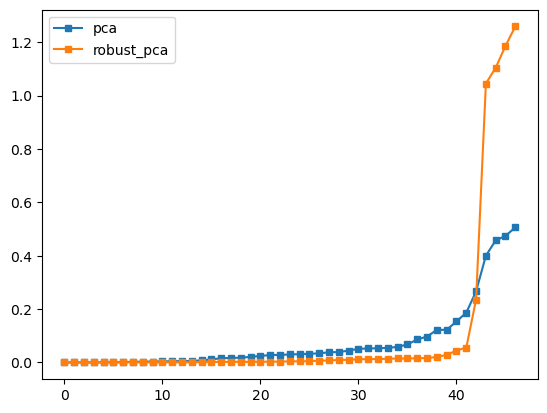

In [12]:
plt.plot(sorted(pca.distance_line(XY1_0, a1_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

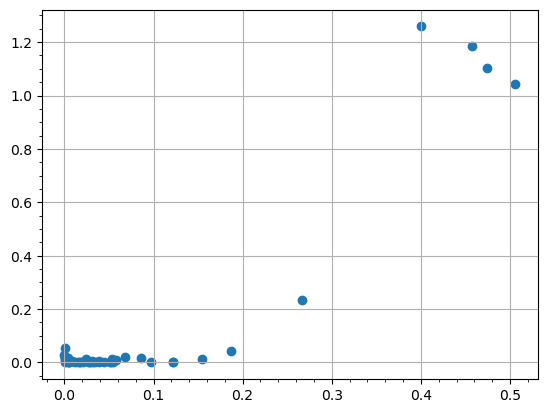

In [13]:
plt.scatter(pca.distance_line(XY1_0, a1_0), pca.distance_line(XY1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [14]:
XY2 = pca.project(XY1, a1)
XY2_0 = pca.project(XY1_0, a1_0)

In [15]:
a2_0, L2_0 = pca.find_pc(XY2_0)
print(L2_0, a2_0)

0.07793090961039001 [0.9901098  0.14029464]


In [16]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-5)/N)
a2, L2 = pca.find_rob_pc(XY2, wma)
print(L2, a2)

0.0005148966842983175 [-0.98404316  0.17792996]


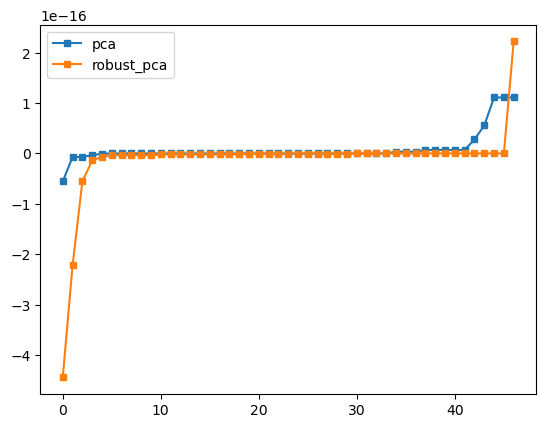

In [17]:
plt.plot(sorted(pca.distance_line(XY2_0, a2_0)), marker='s', markersize=4, label='pca')
plt.plot(sorted(pca.distance_line(XY2, a2)), marker='s', markersize=4, label='robust_pca')
plt.legend()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


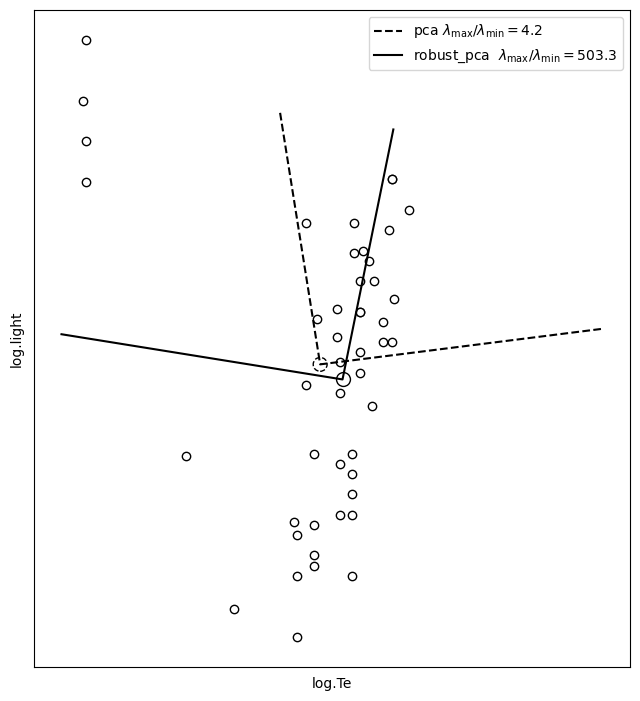

In [18]:
aa = 16/9
plt.figure(figsize=(6.5,4*aa))
plt.scatter(XY0[:,0], XY0[:,1], c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=100, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=100, c='w', edgecolors='k')
plt.plot([c0[0]+a1_0[0], c0[0], c0[0]+a2_0[0]], [c0[1]+a1_0[1], c0[1], c0[1]+a2_0[1]], 
         c='k', linestyle='--', label=r'pca $\lambda_\max/\lambda_\min=%.1f$' % (max(L2_0,L1_0)/min(L2_0,L1_0)))
plt.plot([c[0]+a1[0], c[0], c[0]+a2[0]], [c[1]+a1[1], c[1], c[1]+a2[1]], 
         c='k', label='robust_pca  $\lambda_\max/\lambda_\min=%.1f$' % (max(L2,L1)/min(L2,L1)))
plt.legend()
plt.xticks([])
plt.yticks([])
plt.xlabel('log.Te')
plt.ylabel('log.light')
plt.tight_layout()
plt.savefig('fig/robust_pca_starsCYG.eps')
plt.show()

In [19]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [20]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-6)/N)
S = robust_scatter_matrix(XY1, wma)
print(S)

[[ 4.88147753 -0.86066382]
 [-0.86066382  0.3566015 ]]


In [21]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

[[ 0.98352807  0.18075545]
 [-0.18075545  0.98352807]]


-2.7755575615628914e-17

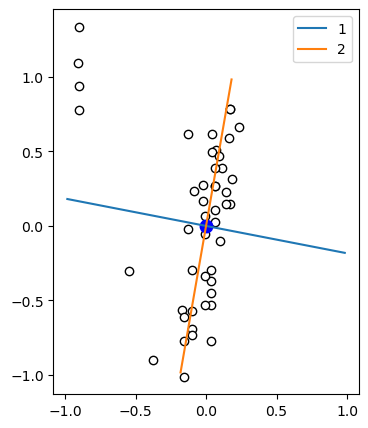

In [22]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [23]:
from sklearn.decomposition import PCA

In [28]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

[[-0.14029465  0.9901098 ]
 [-0.9901098  -0.14029465]]


array([4.31      , 5.01212766])

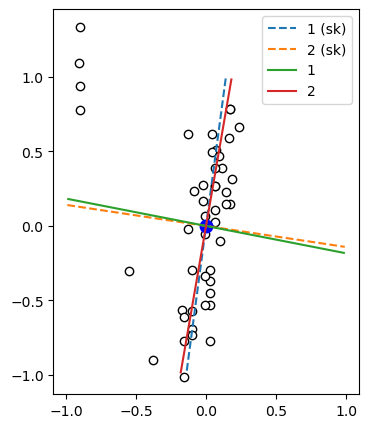

In [25]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()